In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = 'data/'
df = pd.read_csv(f'{data_dir}jobs_flattened_cleaned_1.csv')
# df = pd.read_csv(f'{data_dir}jobs_cleaned_redundant.csv')

df.columns

C:\Users\232_DETI\AppData\Local\Temp\ipykernel_11452\3530434367.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{data_dir}jobs_flattened_cleaned_1.csv')


Index(['allocation_nodes', 'constraints', 'flags', 'group', 'nodes',
       'partition', 'priority', 'qos', 'reservation', 'user',
       ...
       'steps-tres-allocated-energy', 'steps-tres-allocated-node',
       'steps-tres-allocated-billing', 'tres-allocated-cpu',
       'tres-allocated-mem', 'tres-allocated-node', 'tres-requested-cpu',
       'tres-requested-mem', 'tres-requested-node', 'tres-requested-billing'],
      dtype='object', length=119)

In [4]:
from typing import List, Tuple


def extract_nodes_from_node(node_string: str) -> list:
    '''Extract specific nodes from node_string. E.g. e[123-125] -> [e123,e124,e125]'''
    return_nodes = list()

    if '[' in node_string:
        comma_split = node_string[2:len(node_string)-1].split(',')
        for node in comma_split:
            if '-' in node:
                range_low, range_up = node.split('-')
                for i in range(int(range_low), int(range_up) + 1, 1):
                    return_nodes.append(f'e{i}')
            else:
                return_nodes.append(f'e{node}')
    else:
        return_nodes.append(node_string)
    
    return return_nodes

def transform_all_nodes(col_data: pd.Series) -> Tuple[List, List]:
    '''
    Extract exact nodes from the raw nodes column containing slurm 
    node-string representation.

    Return: (`split_nodes`, `all_count`)
    `split_nodes`: nodes converted from slurm string representation  
    into specific nodes separated by comma. The order of rows is untouched.
    `all_count`: one big list of all nodes extracted from the data column. 
    '''
    all_count = list()
    split_nodes = list()

    for node_String in col_data.to_list():
        nodes = extract_nodes_from_node(node_String)
        all_count += nodes
        split_nodes.append(nodes)
    return split_nodes, all_count
    

In [3]:
from collections import Counter
from admire.preprocessing import mapping_functions

split_nodes, all_count = mapping_functions.transform_all_nodes(df['nodes'])

df['split_nodes'] = split_nodes 

counter = Counter(all_count)
top_10_nodes = [node for node, _ in counter.most_common(10)]
top_10_nodes

TypeError: argument of type 'float' is not iterable

In [7]:
for node in top_10_nodes:
    df[node] = df['split_nodes'].apply(lambda x: node in x)
nodes_df = df[top_10_nodes]
nodes_df

,e1194,e1191,e1408,e1268,e1505,e1264,e1266,e1269,e1639,e1267
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
12818,False,False,False,False,False,False,False,False,False,False
12819,False,False,False,False,False,False,False,False,False,False
12820,False,False,False,False,False,False,False,False,False,False
12821,False,False,False,False,False,False,False,False,False,False


Text(0.5, 0, 'Times specific node was used')

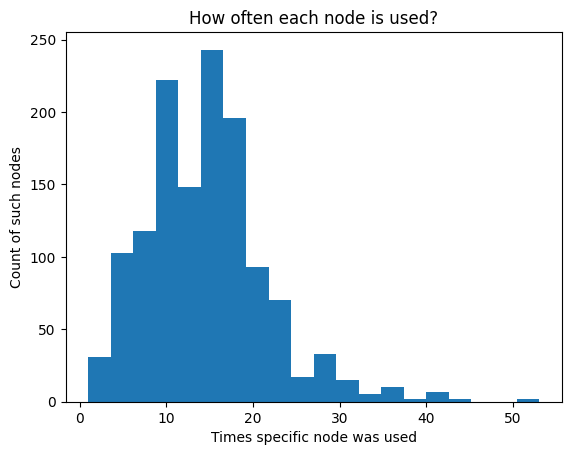

In [8]:
plt.hist(counter.values(), bins=20)
plt.title('How often each node is used?')
plt.ylabel('Count of such nodes')
plt.xlabel('Times specific node was used')

In [9]:
# USERS on NODES
all_df = pd.read_csv('jobs_flattened_cleaned.csv')

for colname in nodes_df.columns: 
    print(f'Node: {colname}, used: {sum(nodes_df[colname])}, by:', Counter(all_df['user'][nodes_df[colname]].to_list()))

Node: e1194, used: 53, by: Counter({'ragsat': 16, 'pharmd': 9, 'andrzej': 9, 'madhavi': 6, 'dmagner': 3, 'kulka': 2, 'arindamsaha1507': 2, 'deepak': 2, 'wojteks': 1, 'sara': 1, 'plgmpuchals': 1, 'pwyrw': 1})
Node: e1191, used: 52, by: Counter({'piotrk': 13, 'ragsat': 12, 'dmagner': 8, 'madhavi': 6, 'plgmtyrolski': 4, 'pharmd': 2, 'arindamsaha1507': 2, 'deepak': 2, 'amarf': 1, 'wojteks': 1, 'andrzej': 1})
Node: e1408, used: 45, by: Counter({'piotrk': 14, 'andrzej': 14, 'madhavi': 5, 'pharmd': 3, 'dmagner': 2, 'ragsat': 2, 'arindamsaha1507': 2, 'amarf': 1, 'emranmasoumi': 1, 'plgmtyrolski': 1})
Node: e1268, used: 43, by: Counter({'komasa': 12, 'deepak': 12, 'andrzej': 9, 'madhavi': 4, 'dkurz': 3, 'irekmosaic': 1, 'ragsat': 1, 'arindamsaha1507': 1})
Node: e1505, used: 42, by: Counter({'piotrk': 14, 'komasa': 11, 'andrzej': 9, 'dmagner': 4, 'bolen': 2, 'plgmtyrolski': 1, 'beata94': 1})
Node: e1264, used: 42, by: Counter({'komasa': 12, 'deepak': 12, 'andrzej': 8, 'madhavi': 4, 'dkurz': 3, '

e1194:[198, 0, 0, 0, 0, 0, 0, 0, 446, 140, 140, 140, 140, 140, 141, 140, 188, 140, 140, 140, 140, 140, 140, 140, 140]
e1191:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 140, 140, 140, 140, 140, 140]
e1408:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 160, 157, 140, 227, 140, 151, 140, 140, 140, 140, 140, 140, 140, 140, 140]


Text(0.5, 0, 'Energy consumed average')

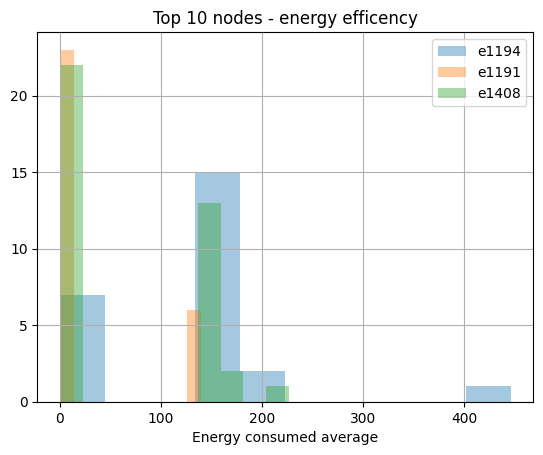

In [80]:
for colname in nodes_df.columns.to_list()[:3]: 
    values = all_df['steps-tres-consumed-total-energy'][all_df['nodes'] == colname].to_list()
    print(f'{colname}:{values}')
    all_df['steps-tres-consumed-total-energy'][all_df['nodes'] == colname].hist(alpha=0.4, label=colname)
plt.legend()
plt.title('Top 10 nodes - energy efficency')
plt.xlabel('Energy consumed average')
    


In [95]:
import datetime

print('Dates for zeros in energy readings for top3 used nodes:')
for colname in nodes_df.columns.to_list()[:3]: 
    values = all_df['steps-tres-consumed-total-energy'][nodes_df[colname] == True].to_list()
    times = all_df['steps-time-start'][nodes_df[colname] == True].to_list()
    times = [datetime.datetime.fromtimestamp(x) for x in times]
    # zeros
    zeros_dates = list(map(lambda x: (x[0], x[1].strftime(r'%Y-%m-%d')), filter(lambda x: x[0] == 0, zip(values, times))))
    print(f'{colname}:{zeros_dates}')


zeros_elapsed_list = []
non_zeros_elapsed_list = []

print('\n\nElapsed time for zeros in energy readings for top3 used nodes:')
for colname in nodes_df.columns.to_list()[:3]: 
    values = all_df['steps-tres-consumed-total-energy'][nodes_df[colname] == True].to_list()
    times = all_df['steps-time-elapsed'][nodes_df[colname] == True].to_list()
    # zeros
    zeros_elapsed = list(map(lambda x: (x[0], f'{x[1]} sec'),filter(lambda x: x[0] == 0, zip(values, times))))
    non_zeros_elapsed = list(map(lambda x: (x[0], f'{x[1]} sec'),filter(lambda x: x[0] != 0, zip(values, times))))
    zeros_elapsed_list += [y for x, y in zeros_elapsed]
    non_zeros_elapsed_list += [y for x, y in non_zeros_elapsed]
    print(f'{colname}:{zeros_elapsed}')

Dates for zeros in energy readings for top3 used nodes:
e1194:[(0, '2023-01-03'), (0, '2023-01-03'), (0, '2023-01-03'), (0, '2023-01-03'), (0, '2023-01-03'), (0, '2023-01-03'), (0, '2023-01-03'), (0, '2023-01-07'), (0, '2023-01-05'), (0, '2023-01-13'), (0, '2023-01-13'), (0, '2023-01-13'), (0, '2023-01-13'), (0, '2023-01-27'), (0, '2023-01-27')]
e1191:[(0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-03'), (0, '2023-01-13'), (0, '2023-01-13'), (0, '2023-01-13'), (0, '2023-01-14'), (0, '2023-01-27'), (0, '2023-01-27')]
e1408:[(0, '2022-12-31'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-01-02'), (0, '2023-0

PCA visualization

In [21]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from typing import Tuple
import numpy as np
import plotly.express as px
import pandas as pd


def pca_1(df):
    pca = PCA(n_components=3, random_state=42)
    X_pca = pca.fit_transform(df)
    print('Explained variance: ', sum(pca.explained_variance_ratio_))
    return pca.explained_variance_ratio_, X_pca

df = pd.read_csv('jobs_cleaned_redundant.csv')
print('Available columns: ', df.columns.to_list())
le = preprocessing.LabelEncoder()
scaler = StandardScaler()

df_pca = df[[
    # GLOBAL
    'allocation_nodes', 'flags', 'group', 
    'partition', 'priority', 'required-CPUs', 
    'required-memory', 'nodes',
    # ALLOCATED
    'steps-tres-allocated-cpu', 
    'steps-tres-allocated-mem',
    # TIME
    'steps-time-elapsed', 
    'steps-time-system-seconds', 
    'steps-time-user-seconds', 
    # REQUESTED
    'steps-tres-requested-max-cpu', 
    'steps-tres-requested-max-mem', 
    'steps-tres-requested-max-fs',
    'steps-tres-requested-max-vmem', 
    # CONSUMED
    'steps-tres-consumed-max-energy', 
    'steps-tres-consumed-max-fs'
    ]]


Available columns:  ['allocation_nodes', 'constraints', 'flags', 'group', 'nodes', 'partition', 'priority', 'qos', 'working_directory', 'required-CPUs', 'required-memory', 'state-reason', 'steps-nodes-list', 'steps-nodes-count', 'steps-nodes-range', 'steps-time-elapsed', 'steps-time-end', 'steps-time-start', 'steps-time-system-seconds', 'steps-time-system-microseconds', 'steps-time-total-seconds', 'steps-time-total-microseconds', 'steps-time-user-seconds', 'steps-time-user-microseconds', 'steps-statistics-CPU-actual_frequency', 'steps-step-job_id', 'steps-step-id', 'steps-step-name', 'steps-tres-requested-max-cpu', 'steps-tres-requested-max-cpu-node', 'steps-tres-requested-max-mem', 'steps-tres-requested-max-energy', 'steps-tres-requested-max-fs', 'steps-tres-requested-max-vmem', 'steps-tres-consumed-max-energy', 'steps-tres-consumed-max-fs', 'steps-tres-allocated-cpu', 'steps-tres-allocated-mem', 'tres-allocated-cpu', 'tres-allocated-mem']


In [22]:
for col in ['flags', 'group', 'partition', 'nodes']:
    df_pca[col] = le.fit_transform(df_pca[col].to_numpy())
    print(le.classes_)


df_numpy = df_pca.to_numpy()
df_numpy = scaler.fit_transform(df_numpy)

['STARTED_ON_BACKFILL' 'STARTED_ON_SCHEDULE' "STARTED_ON_SUBMIT']"]
['admins' 'plgrid-users' 'staff' 'users']
['altair' 'biology_night' 'fast' 'plgrid' 'standard' 'tesla']
['e1089' 'e1090' 'e1091' ... 'e[2403-2406]' 'gpu05' 'gpu09']


C:\Users\232_DETI\AppData\Local\Temp\ipykernel_17396\1058947801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca[col] = le.fit_transform(df_pca[col].to_numpy())
C:\Users\232_DETI\AppData\Local\Temp\ipykernel_17396\1058947801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca[col] = le.fit_transform(df_pca[col].to_numpy())
C:\Users\232_DETI\AppData\Local\Temp\ipykernel_17396\1058947801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Text(0.5, 1.0, 'Correlation plot (only for features with absolute correlation > .3)')

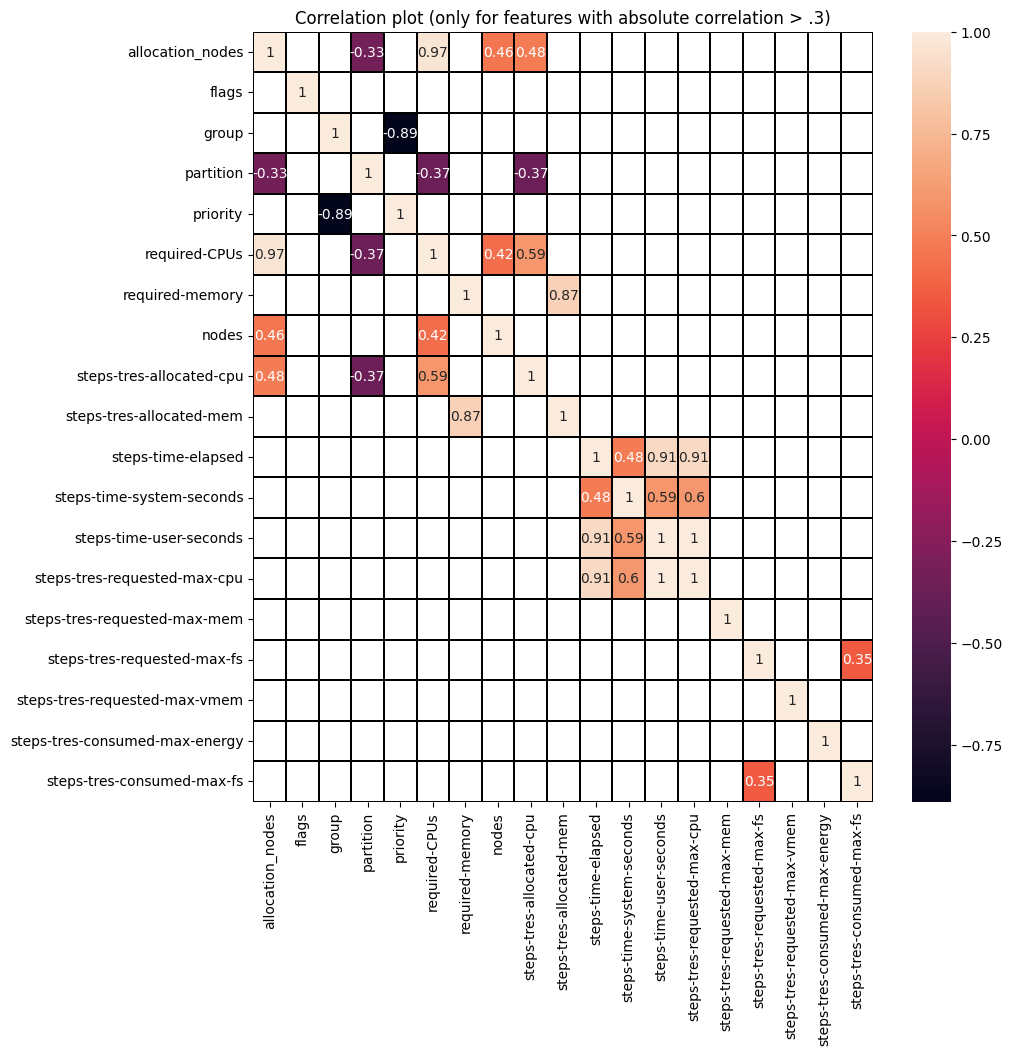

In [23]:

standard_df = pd.DataFrame(df_numpy, columns=df_pca.columns)

plt.figure(figsize=(10,10))

corr = standard_df.corr().round(2)
sns.heatmap(corr[corr.abs() > 0.3], annot=True, linewidths=0.1, linecolor='black')
plt.title('Correlation plot (only for features with absolute correlation > .3)')

In [19]:
var_ratio, pca = pca_1(df_numpy)
print(var_ratio)
print(pca.shape)

Explained variance:  0.45992158336622024
[0.18275508 0.16868287 0.10848363]
(12823, 3)


In [20]:
visual_df = pd.DataFrame(pca, columns=['pca_dim0', 'pca_dim1', 'pca_dim2'])
visual_df = pd.concat([visual_df, df_pca, nodes_df], axis='columns')
print(visual_df.shape)

(12823, 32)


In [156]:
colors_for_nodes = np.zeros(visual_df.shape[0]).astype('object')
for i in range(5):
    colors_for_nodes[nodes_df[top_10_nodes[i]]] = top_10_nodes[i]
colors_for_nodes[(colors_for_nodes == 0.0).astype(bool)] = 'other'

sizes_for_nodes = np.ones_like(colors_for_nodes).astype('float')
sizes_for_nodes[(colors_for_nodes == 'other').astype(bool)] = 0.2 
sizes_for_nodes[(colors_for_nodes != 'other').astype(bool)] = 2.0 

np.unique(sizes_for_nodes)


array([0.2, 2. ])

In [155]:
title = 'PCA on jobs'
fig = px.scatter_3d(visual_df, x='pca_dim0', y='pca_dim1', z='pca_dim2', color=colors_for_nodes, title=title, size=sizes_for_nodes)
#fig.update_traces(marker=dict(size=2))
fig.show(renderer='browser')